In [1]:
import data_loader as loader
import my_module as mod
import pandas as pd
import numpy as np
import logging
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Настройка логирования с выводом сообщений в консоль
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Загрузка данных
logger.info("Начало загрузки данных.")
dataF = loader.load_dataF_excel('Dry_Bean_Dataset.xlsx', 'Class')

# Получение информации о датасете
logger.info("Получение статистической информации о датасете.")
mod.statistic_dataF(dataF)  # Пропусков нет, наблюдений достаточно, категория - только целевая переменная

# Вывод списка уникальных значений целевой переменной
logger.info("Вывод уникальных значений целевой переменной 'Class'.")
print(dataF['Class'].unique())
logger.info(f"Уникальные значения целевой переменной: {dataF['Class'].unique()}")


2025-02-27 23:24:30,599 - INFO - Начало загрузки данных.
2025-02-27 23:24:30,603 - INFO - Загрузка данных из Excel файла: Dry_Bean_Dataset.xlsx
2025-02-27 23:24:35,539 - INFO - Данные успешно загружены и разделены.
2025-02-27 23:24:35,566 - INFO - Матрица признаков X:
        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.18797

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

2025-02-27 23:27:39,779 - INFO - Построение гистограммы для колонки: Class


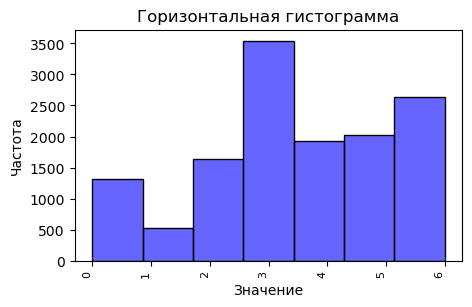

2025-02-27 23:27:40,170 - INFO - Гистограмма для колонки Class успешно построена.
2025-02-27 23:27:40,173 - INFO - Кодирование категориальных признаков: ['Class']


In [10]:
import plot
plot.hist(dataF,'Class') # видим что наблюдения не равномерно распределены для каждого класса

# кодируем целевую переменную, так это категория а не число
mod.encoder(dataF, ['Class'])

In [3]:
# выведем список уникальных значений целевой переменной
mod.unique_values(dataF, 'Class')

2025-02-27 23:24:38,699 - INFO - Вывод уникальных значений для колонки Class.


[5 0 1 2 4 6 3]


2025-02-27 23:24:40,158 - INFO - Построение гистограммы для колонки: Class


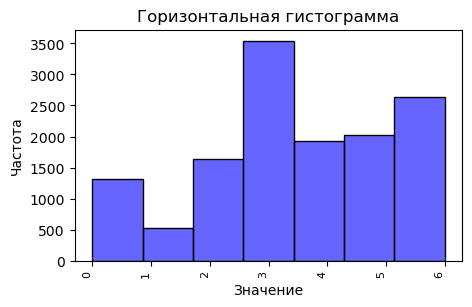

2025-02-27 23:24:40,487 - INFO - Гистограмма для колонки Class успешно построена.


In [4]:
import plot
plot.hist(dataF,'Class') # видим что наблюдения не равномерно распределены для каждого класса

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

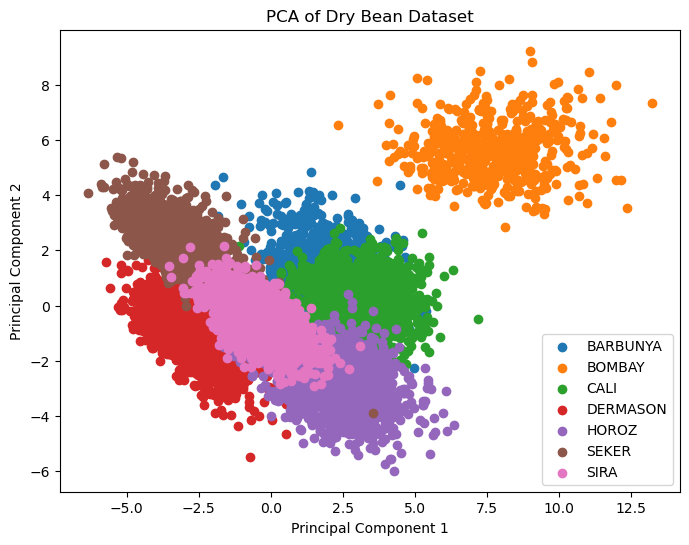

Объясненная дисперсия каждой компоненты: [0.55466439 0.26430973 0.08006564 0.0511408  0.02739293 0.01149761]
Суммарная объясненная дисперсия: 0.989071101460485


In [5]:
#  в данной клетке потренируемся снижать размерность, оставим датафрейм, и его анализ и попробуем поработать по-другому
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_excel('Dry_Bean_Dataset.xlsx')

# Просмотр данных
print(data.head())

# Разделение данных на признаки (X) и метки (y)
X = data.iloc[:, :-1]  # Все столбцы, кроме последнего (признаки)
y = data.iloc[:, -1]   # Последний столбец (метки классов)

# Стандартизация данных
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Применение PCA
pca = PCA(n_components=6)  # Уменьшаем до 6 компонент 
X_pca = pca.fit_transform(X_standardized)

# Проверка типа X_pca
print(type(X_pca))  # <class 'numpy.ndarray'>

# Вывод формы массива
print(X_pca.shape)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Визуализация результатов
plt.figure(figsize=(8, 6))
for class_value in np.unique(y):
    plt.scatter(X_pca[y == class_value, 0], X_pca[y == class_value, 1], label=class_value)
plt.title("PCA of Dry Bean Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print("Объясненная дисперсия каждой компоненты:", explained_variance)
print("Суммарная объясненная дисперсия:", sum(explained_variance))

In [6]:
# очень плотно расположены 6 классов из 7 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Список моделей
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Neighbors": KNeighborsClassifier(weights='distance'), #  так как датасет несбалансирован
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Dummy Classifier": DummyClassifier(strategy='stratified'),
    "SVM": OneVsRestClassifier(SVC(kernel='rbf', random_state=42, class_weight='balanced', gamma='scale', probability=True))
    # если убрать probability=True, 'ROC-AUC' будет не определен, но существенно увеличится скорость обучения
}  # заменили kernel='linear' на  kernel='rbf' 

In [8]:
import time
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train) 
# Оценка моделей
results = {}
for name, model in models.items():
    try:
        logger.info(f"Начало обучения модели: {name}")
        
        # Замер времени начала обучения
        start_time = time.time()
        
        # Для KNN: поиск оптимального k
        if name == "K-Neighbors":
            logger.info("Поиск оптимального числа соседей (k) для KNN.")
            param_grid = {'n_neighbors': range(1, 21)}  # Проверяем k от 1 до 20
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
            grid_search.fit(X_train, y_train)
            
            # Используем лучший найденный k
            best_k = grid_search.best_params_['n_neighbors']
            model = KNeighborsClassifier(n_neighbors=best_k)
            logger.info(f"Оптимальное число соседей (k) для KNN: {best_k}")
        
        # обучение модели
        if model is not None:
            logger.info(f"Обучение модели: {name}")

        if name in ["Gradient Boosting"]:
            model.fit(X_train, y_train, sample_weight=sample_weights)
            logger.info(f"Обучение  {name} с sample_weight.")
        else:
            model.fit(X_train, y_train)
            logger.info(f"Обучение без sample_weight.")
                           
        # Замер времени окончания обучения
        training_time = time.time() - start_time
        logger.info(f"Модель {name} обучена за {training_time:.2f} секунд.")
        
        # Предсказание
        logger.info(f"Предсказание на тестовых данных для модели: {name}")
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
        
        # Метрики
        logger.info(f"Вычисление метрик для модели: {name}")
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=np.nan)
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Оценка ROC-AUC
        if y_pred_proba is not None:
            roc_auc = roc_auc_score(
                label_binarize(y_test, classes=np.unique(y_test)),
                y_pred_proba,
                multi_class='ovr'
            )
        else:
            roc_auc = None
            logger.warning(f"Модель {name} не поддерживает predict_proba, ROC-AUC не вычислен.")
        
        # Сохранение результатов
        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "ROC-AUC": roc_auc,
            "Training Time (s)": training_time  # Добавляем время обучения
        }
        logger.info(f"Метрики для модели {name}: {results[name]}")
    
    except Exception as e:
        logger.error(f"Ошибка при обучении или оценке модели {name}: {e}")
        continue

logger.info("Оценка всех моделей завершена.")


2025-02-27 23:25:02,342 - INFO - Начало обучения модели: Gradient Boosting
2025-02-27 23:25:02,345 - INFO - Обучение модели: Gradient Boosting
2025-02-27 23:25:55,365 - INFO - Обучение  Gradient Boosting с sample_weight.
2025-02-27 23:25:55,366 - INFO - Модель Gradient Boosting обучена за 53.02 секунд.
2025-02-27 23:25:55,367 - INFO - Предсказание на тестовых данных для модели: Gradient Boosting
2025-02-27 23:25:55,420 - INFO - Вычисление метрик для модели: Gradient Boosting
2025-02-27 23:25:55,472 - INFO - Метрики для модели Gradient Boosting: {'Accuracy': 0.9298567756151304, 'Precision': 0.930623347731766, 'Recall': 0.9298567756151304, 'F1-Score': 0.9301011732334539, 'ROC-AUC': np.float64(0.9947988105524497), 'Training Time (s)': 53.02123260498047}
2025-02-27 23:25:55,473 - INFO - Начало обучения модели: K-Neighbors
2025-02-27 23:25:55,474 - INFO - Поиск оптимального числа соседей (k) для KNN.
2025-02-27 23:26:00,697 - INFO - Оптимальное число соседей (k) для KNN: 4
2025-02-27 23:26:

In [9]:
from sklearn.metrics import confusion_matrix
# Вывод результатов
logger.info("Начало вывода результатов оценки моделей.")
for model_name, metrics in results.items():
    try:
        logger.info(f"Модель: {model_name}")
        logger.info(f"Accuracy: {metrics['Accuracy']:.4f}")
        logger.info(f"Precision: {metrics['Precision']:.4f}")
        logger.info(f"Recall: {metrics['Recall']:.4f}")
        logger.info(f"F1-Score: {metrics['F1-Score']:.4f}")
        # Получаем значение ROC-AUC
        roc_auc_value = metrics['ROC-AUC']

        # Форматируем значение
        roc_auc_str = f"{float(roc_auc_value):.4f}" if roc_auc_value is not None else 'N/A'

        # Логируем результат
        logger.info(f"ROC-AUC: {roc_auc_str}")
        # logger.info(f"ROC-AUC: {roc_auc_value:.4f if roc_auc_value is not None else 'N/A'}")
        logger.info(f"Training Time (s): {metrics['Training Time (s)']:.2f}")
        logger.info("-" * 40)
    except Exception as e:
        logger.error(f"Ошибка при выводе результатов для модели {model_name}: {e}")

# Сравнительная таблица
try:
    logger.info("Создание сравнительной таблицы метрик.")
    results_df = pd.DataFrame(results).T
    logger.info("\nСравнительная таблица метрик:")
    logger.info("\n" + str(results_df))
except Exception as e:
    logger.error(f"Ошибка при создании сравнительной таблицы: {e}")

logger.info("Вывод результатов завершен.")

2025-02-27 23:27:32,143 - INFO - Начало вывода результатов оценки моделей.
2025-02-27 23:27:32,143 - INFO - Модель: Gradient Boosting
2025-02-27 23:27:32,144 - INFO - Accuracy: 0.9299
2025-02-27 23:27:32,144 - INFO - Precision: 0.9306
2025-02-27 23:27:32,146 - INFO - Recall: 0.9299
2025-02-27 23:27:32,146 - INFO - F1-Score: 0.9301
2025-02-27 23:27:32,147 - INFO - ROC-AUC: 0.9948
2025-02-27 23:27:32,147 - INFO - Training Time (s): 53.02
2025-02-27 23:27:32,147 - INFO - ----------------------------------------
2025-02-27 23:27:32,149 - INFO - Модель: K-Neighbors
2025-02-27 23:27:32,150 - INFO - Accuracy: 0.7165
2025-02-27 23:27:32,150 - INFO - Precision: 0.7198
2025-02-27 23:27:32,151 - INFO - Recall: 0.7165
2025-02-27 23:27:32,152 - INFO - F1-Score: 0.7146
2025-02-27 23:27:32,153 - INFO - ROC-AUC: 0.9268
2025-02-27 23:27:32,153 - INFO - Training Time (s): 5.24
2025-02-27 23:27:32,155 - INFO - ----------------------------------------
2025-02-27 23:27:32,155 - INFO - Модель: Decision Tree

In [ ]:
# Выводы:
# Gradient Boosting демонстрирует наилучшие результаты по всем ключевым метрикам, кроме скорости обучения
# Decision Tree — это быстрая и эффективная модель, которая уступает Gradient Boosting по точности, но значитель превосходит по скорости обучения.
# K-Neighbors показывает средние результаты по всем метрикам.
# SVM выдал низкую точность предсказаний и низкий Recall и F1-Score 
    # но по сравнению с предыдущим вариантом настроек скорость сократилась в разы
# Dummy Classifier — худший результат, это базовая модель, которая используется для сравнения.
   # Её результаты показывают, что другие модели значительно лучше справляются с задачей классификации.